In [83]:
import numpy as np
import pandas as pd
import os

In [45]:
from sklearn import datasets

# For splitting data into groups
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# For modeling functions
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import xgboost as XGB


# Data Visualize
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [46]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [47]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [84]:
percentage_null = (df_train.isnull().sum()/len(df_train) * 100).sort_values(ascending=False)
np.round(percentage_null.head(19), 2)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
Electrical       0.07
dtype: float64

In [96]:
# visualize
import seaborn as sns
import matplotlib
import plotly.express as px

# visualize settings
sns.set_palette('Spectral')
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

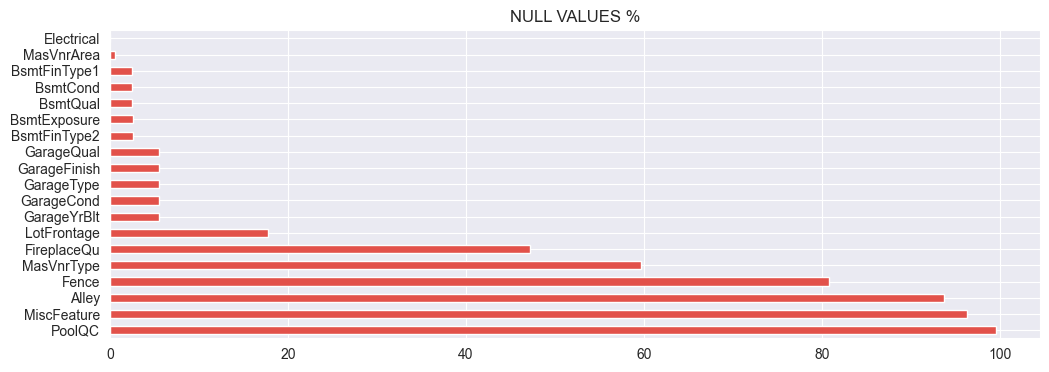

In [107]:
plt.figure(figsize=(12, 4))
percentage_null = percentage_null[percentage_null != 0]
percentage_null.plot(kind='barh')
plt.title("NULL VALUES %")
plt.show()

In [108]:
df_transform = df_train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'LotFrontage', 'FireplaceQu'], axis=1)
percentage_null = (df_transform.isnull().sum()/len(df_transform) * 100).sort_values(ascending=False)
np.round(percentage_null.head(19), 2)

GarageType      5.55
GarageCond      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrArea      0.55
Electrical      0.07
WoodDeckSF      0.00
PavedDrive      0.00
LowQualFinSF    0.00
GrLivArea       0.00
BsmtFullBath    0.00
BsmtHalfBath    0.00
FullBath        0.00
dtype: float64

In [109]:
df_view_null = df_transform.loc[:, ['GarageType', 'GarageCond', 'GarageYrBlt',
                     'GarageFinish', 'BsmtFinType2', 'BsmtExposure',
                     'BsmtFinType1', 'BsmtCond', 'BsmtQual']]

In [110]:
df_view_null.duplicated().sum()

337

In [111]:
df_view_null.head()

,GarageType,GarageCond,GarageYrBlt,GarageFinish,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual
0,Attchd,TA,2003.0,RFn,Unf,No,GLQ,TA,Gd
1,Attchd,TA,1976.0,RFn,Unf,Gd,ALQ,TA,Gd
2,Attchd,TA,2001.0,RFn,Unf,Mn,GLQ,TA,Gd
3,Detchd,TA,1998.0,Unf,Unf,No,ALQ,Gd,TA
4,Attchd,TA,2000.0,RFn,Unf,Av,GLQ,TA,Gd


In [56]:
df_transform.columns.to_list()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolA

In [57]:
catvars = df_transform.select_dtypes(include=['object']).columns
numvars = df_transform.select_dtypes(include = ['int32', 'int64', 'float32', 'float64']).columns

In [58]:
catvars.to_list()

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [59]:
numvars.to_list()

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [60]:
np.round(df_transform.describe(exclude=[object]))

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.0,57.0,10517.0,6.0,6.0,1971.0,1985.0,104.0,444.0,47.0,...,94.0,47.0,22.0,3.0,15.0,3.0,43.0,6.0,2008.0,180921.0
std,422.0,42.0,9981.0,1.0,1.0,30.0,21.0,181.0,456.0,161.0,...,125.0,66.0,61.0,29.0,56.0,40.0,496.0,3.0,1.0,79443.0
min,1.0,20.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,366.0,20.0,7554.0,5.0,5.0,1954.0,1967.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.0,50.0,9478.0,6.0,5.0,1973.0,1994.0,0.0,384.0,0.0,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.0,70.0,11602.0,7.0,6.0,2000.0,2004.0,166.0,712.0,0.0,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


In [61]:
df_transform.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [62]:
def uniqueval(col):
    print(f'Details of particular col {col} is {df_transform[col].unique()}')

def value_couts(col):
    print(f'Valuecounts of particular col {col} is {df_transfomr[col].value_counts()}')


for col in df_transform.columns:
    uniqueval(col)
    print('-' * 150)

Details of particular col Id is [   1    2    3 ... 1458 1459 1460]
------------------------------------------------------------------------------------------------------------------------------------------------------
Details of particular col MSSubClass is [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
------------------------------------------------------------------------------------------------------------------------------------------------------
Details of particular col MSZoning is ['RL' 'RM' 'C (all)' 'FV' 'RH']
------------------------------------------------------------------------------------------------------------------------------------------------------
Details of particular col LotArea is [ 8450  9600 11250 ... 17217 13175  9717]
------------------------------------------------------------------------------------------------------------------------------------------------------
Details of particular col Street is ['Pave' 'Grvl']
-------------------------

In [63]:
df_transform = df_transform.loc[:, ['OverallQual', 'GrLivArea',         #visualizing
                                    'GarageCars',
                                     'TotalBsmtSF',
                                     '1stFlrSF',
                                     'FullBath',
                                     'TotRmsAbvGrd',
                                     'YearBuilt',
                                     'YearRemodAdd',
                                     'LotArea',
                                     'SalePrice'
]]

In [64]:
df_transform.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LotArea,SalePrice
0,7,1710,2,856,856,2,8,2003,2003,8450,208500
1,6,1262,2,1262,1262,2,6,1976,1976,9600,181500
2,7,1786,2,920,920,2,6,2001,2002,11250,223500
3,7,1717,3,756,961,1,7,1915,1970,9550,140000
4,8,2198,3,1145,1145,2,9,2000,2000,14260,250000


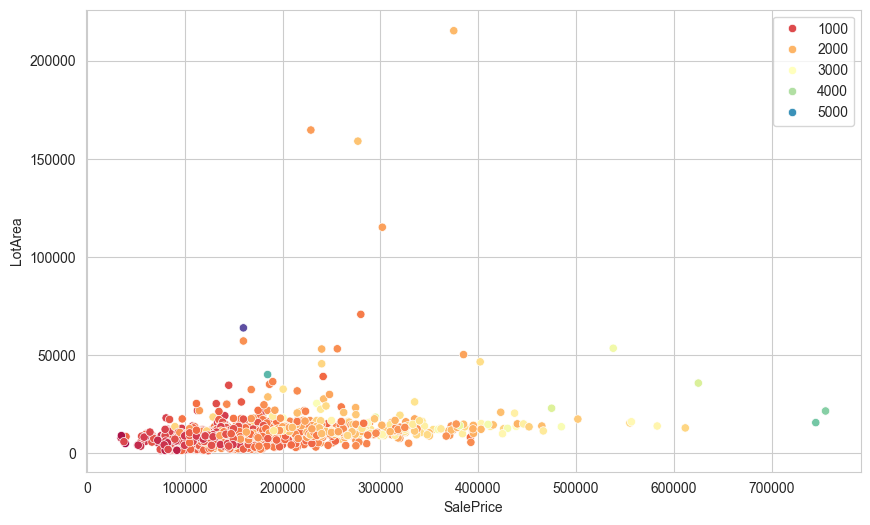

In [65]:
sns.scatterplot(data=df_transform,

           y='LotArea',
           x='SalePrice',
           hue='GrLivArea', palette="Spectral")

plt.legend()
plt.show()

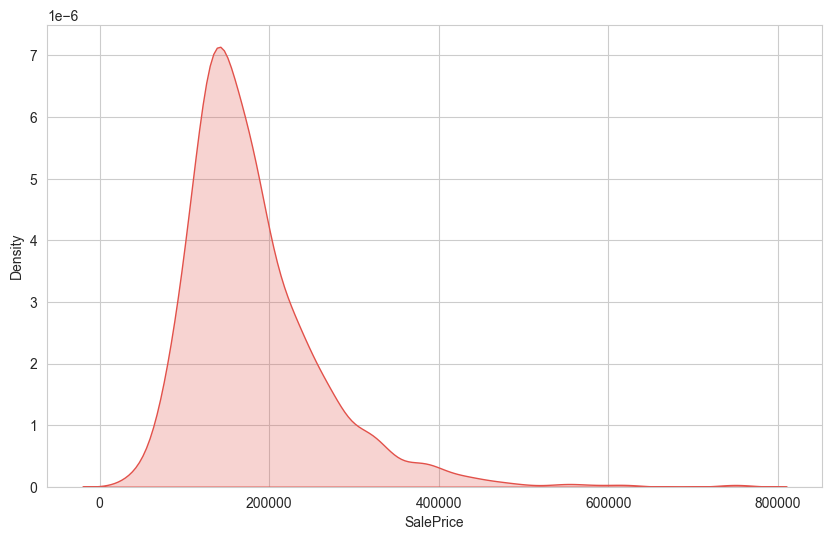

In [66]:
sns.kdeplot(data=df_transform,
           x='SalePrice', fill=True)

plt.show()

In [67]:
df_transform.corr()['SalePrice']

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
LotArea         0.263843
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [68]:
test = np.log(df_transform['SalePrice'])
train = df_transform.drop(['SalePrice'], axis=1)

In [69]:
test.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [70]:
train.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LotArea
0,7,1710,2,856,856,2,8,2003,2003,8450
1,6,1262,2,1262,1262,2,6,1976,1976,9600
2,7,1786,2,920,920,2,6,2001,2002,11250
3,7,1717,3,756,961,1,7,1915,1970,9550
4,8,2198,3,1145,1145,2,9,2000,2000,14260


In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [72]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.15, random_state=101)

In [73]:
step_1 = LinearRegression()

pipe = Pipeline([
    ('step_1', step_1)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# Calcular MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Calcular RMSE
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

MAE: 0.12504755982417431
MSE: 0.05846524811613308
RMSE: 0.24179588109836173


In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
step_1 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step_1', step_1)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [76]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# Calcular MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Calcular RMSE
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

MAE: 0.13664798827110677
MSE: 0.04669018286943273
RMSE: 0.21607911252463236


In [77]:
col = {'Original':y_test, 'Pred':y_pred}
pd.DataFrame(col).head()

,Original,Pred
1054,12.449019,12.436292
361,11.884489,11.933239
1282,11.921718,11.825765
161,12.929991,13.007174
515,12.906347,12.852485


0.17670507627189427

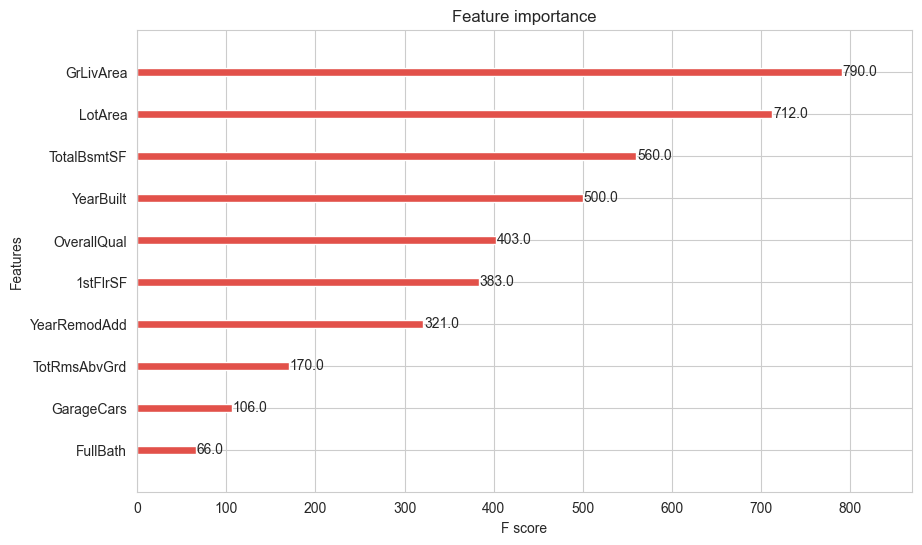

In [78]:
import xgboost  #XAI method
xgb = xgboost.XGBRegressor(objective = 'reg:squarederror')
xgb.fit(X_train, y_train)
xgboost.plot_importance(xgb, max_num_features = 15);
y_pred = xgb.predict(X_test)
mean_squared_error(y_test,y_pred, squared=False)

In [79]:
from xgboost import XGBRegressor
import optuna
def objective_xg(trial):
    """Define the objective function"""

    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'max_leaves': trial.suggest_int('max_leaves', 8, 1024),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 400, 1500),
        'min_child_weight': trial.suggest_int('min_child_weight', 10, 20),
        'subsample': trial.suggest_float('subsample', 0.3, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 0.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.3, 0.8),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.01, 0.5),
        "random_state" : trial.suggest_categorical('random_state', [42]),
        'objective': trial.suggest_categorical('objective', ['reg:squarederror']),
        "n_jobs" : trial.suggest_categorical('n_jobs', [-1]),
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
    }

    model_xgb = XGBRegressor(**params)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    return mean_squared_error(y_test,y_pred, squared=False)

In [80]:
study_xgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgb.optimize(objective_xg, n_trials=50,show_progress_bar=True)

Best trial: 48. Best value: 0.166816: 100%|██████████| 50/50 [00:51<00:00,  1.03s/it]


In [81]:
print('Best parameters', study_xgb.best_params)

Best parameters {'booster': 'gbtree', 'max_depth': 10, 'max_leaves': 91, 'learning_rate': 0.06506734141895891, 'n_estimators': 1157, 'min_child_weight': 10, 'subsample': 0.7681312299288239, 'reg_alpha': 0.2311097992404951, 'reg_lambda': 0.6082618884587291, 'colsample_bylevel': 0.6082000090225905, 'colsample_bytree': 0.8036907208018661, 'colsample_bynode': 0.360473253148985, 'random_state': 42, 'objective': 'reg:squarederror', 'n_jobs': -1, 'grow_policy': 'depthwise'}


In [82]:
xgb = XGBRegressor(**study_xgb.best_params)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('Error: ', mean_squared_error(y_test,y_pred, squared=False))

Error:  0.16681599953488463
